# NLTK basics

## Explore nltk corpuses and basic nltk tools

In [1]:
## Initialization : load needed libraries

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy 

In [2]:
# nltk.download(book)          # Download nltk book collection if it hasn't been downloaded yet

from nltk.book import *        # load all from book


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Here is a list of materials in the nltk book collection.

In [3]:
texts()                        # View list of texts
sents()                        # View list of sentences

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


### Counting text and vocabulary

#### Using basic methods


In [4]:
titles = ['Moby Dick', 'Inaugural speech', 'Chat corpus', 'Wall Street Journal']

wlen = [len(text1), len(text4), len(text5), len(text7)]
tlen = [len(text1.vocab()), len(text4.vocab()), len(text5.vocab()), len(text7.vocab())]

from tabulate import tabulate

table = [[ti, w, t, round(w/t, 2)] for ti, w, t in zip(titles, wlen, tlen)]
headers = ['Title', 'Words', 'Unique words', 'Lexical diversity']
print(tabulate(table, headers, tablefmt = 'github'))

print('Number of times the word "Whale" appears in Moby Dick', text1.count('Whale'))
print('Number of times the word "whale" appears in Moby Dick', text1.count('whale'))

| Title               |   Words |   Unique words |   Lexical diversity |
|---------------------|---------|----------------|---------------------|
| Moby Dick           |  260819 |          19317 |               13.5  |
| Inaugural speech    |  149797 |           9913 |               15.11 |
| Chat corpus         |   45010 |           6066 |                7.42 |
| Wall Street Journal |  100676 |          12408 |                8.11 |
Number of times the word "Whale" appears in Moby Dick 282
Number of times the word "whale" appears in Moby Dick 906



### Frequency distribution
    
#### Using *FreqDist()* to returns some basic statistics on **Moby Dick** (text1). 

Number of words :  260819
Number of unique words :  19317
Most frequent word/type in the text :  ,
Proportion of commas "," in the text :  0.07174707364110744
Proportion of the word "whale" in text :  0.003473673313677301


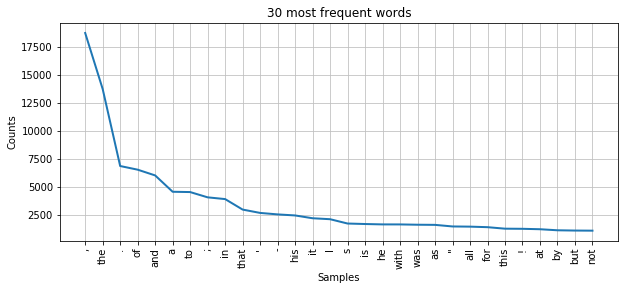

In [230]:
fdist = FreqDist(text1)          # Frequency distribution for text1

print('Number of words : ', fdist.N())                           
print('Number of unique words : ', fdist.B())                 
print('Most frequent word/type in the text : ', fdist.max())
print('Proportion of commas "," in the text : ', fdist.freq(',')) 
print('Proportion of the word "whale" in text : ', fdist.freq('whale') )

plt.figure(figsize=(10,4))
fdist.plot(30, title='30 most frequent words')     # Need matplotlib
plt.show()


#### The plot above shows the 30 most frequent words in **Moby Dick**. Without any filtering, the most frequent words are mostly stop words. The most frequent word is comma (,) making a bit over 7% of the text, compare to the word '*whale*' making about 0.35% of the text.

#### In the following, we filter off stop words and punctuation. The 30 most frequent words now give some information about the text. We get an idea that the story takes place mostly at sea and it's about a whale and a character Ahab.

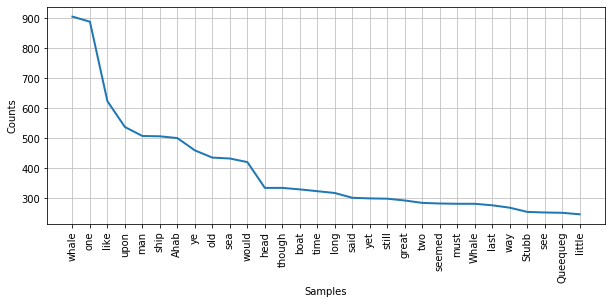

The most frequent word :  whale
The most frequent word in percentage :  0.81 %


In [234]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
from string import punctuation

text1_fil = [token for token in text1.tokens if token.lower() not in stopWords and token not in punctuation
            and token not in ['--', '."', ',"', '?"']]
fdist_fil = FreqDist(text1_fil)

plt.figure(figsize=(10,4))
fdist_fil.plot(30)
plt.show()

print('The most frequent word : ' , fdist_fil.max())
print('The most frequent word in percentage : ' , round(fdist_fil.freq(fdist_fil.max())*100, 2), '%')


## Explore the context of text

The dispersion plot shows the positional distribution of some chosen words in the *Moby Dick* text. At a glance we can also have a sense of how frequent a word is used. In *Moby Dick*,  '***good***' is significantly more frequent than '***evil***' and it is not very '***angry***'.

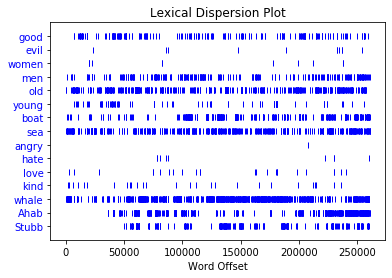

In [235]:
text1.dispersion_plot(['good', 'evil', 'women', 'men', 'old', 'young', 'boat', 
                       'sea', 'angry', 'hate', 'love', 'kind', 'whale', 'Ahab', 'Stubb'])



The $\color{blue}{collocation( )}$ function or $\color{blue}{collocation\_list( )}$ returns the most frequent bigrams in the text giving a better context view of the text. We see that Ahab is the captain of a boat, the story went to New Bedford and Cape Horn and  somebody has an ivory leg.


In [233]:

print('; '.join(text1.collocation_list()))


Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab; years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief mate; white whale; ivory leg; one hand


We use $\color{blue}{concordance()}$ for the word '*ivory*' to find out more about the '*ivory leg*'. From the output, the 4th row from the bottom, we see that Ahab has not only ivory leg but also ivory hands. On the last line, there is another captain who has ivory limbs, presumably Captain Peleg.


In [237]:
text1.concordance('ivory', width=80, lines=35)

# text1.similar('old')
#text1.common_contexts(['old', 'ahab'])

Displaying 35 of 56 matches:
set with glittering teeth resembling ivory saws ; others were tufted with knots
 ; and the whale shoots - to all his ivory teeth , like so many white bolts , u
land , and there they found an empty ivory casket ,-- the poor little Indian ' 
neck heavy with pendants of polished ivory . She was a thing of trophies . A ca
ftly travelled over sheaves of sea - ivory . Scorning a turnstile wheel at her 
n the moonlight ; and like the white ivory tusks of some huge elephant , vast c
 had previously come to me that this ivory leg had at sea been fashioned from t
his pivot - hole , or seated upon an ivory stool he had ; or heavily walking th
king repose within six inches of his ivory heel , such would have been the reve
, and the insertion into it , of the ivory heel . Ah ! Stubb , thou didst not k
he watch , he sent him below for his ivory stool , and also his pipe . Lighting
never had . You know the old man ' s ivory leg , well I dreamed he kicked me wi
Very good ,